# Ejercicios Tema 8

---

`Ejercicio 4 Para casa`

>*Implementa la versión del modelo del votante invertida (push). Luego, realiza simulaciones para medir el tiempo promedio necesario para la formación de consenso en cada caso.*

---












In [4]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd
import simulador

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes() :
        g.nodes[i]['estado'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g,with_labels = True, cmap=cm.binary,vmin = 0,vmax = 1,node_color=['red' if g.nodes[i]['estado']==1 else 'green' for i in g.nodes()])

def update():
    global g
    hablante = rd.randrange(0, len(g.nodes))
    seen = set([])
    for neighbor in g.neighbors(hablante):
        if neighbor not in seen:
            seen.add(neighbor)
    seen_list = list(seen)
    oyente = rd.choice(seen_list)
    g.nodes[oyente]['estado'] = g.nodes[hablante]['estado']

simulador.GUI().start(func=[initialize, observe, update])

En las 5 simulaciones he obtenido los siguientes datos:

Iteraciones en las que se alcanza el consenso:
1600, 4080, 11100, 4620 y 5040.

Con un promedio de 5288 iteraciones hasta el consenso.

---

`Ejercicio 5 Para casa`

>*Implementa la versión del modelo del votante basada en la arista. Luego, realiza simulaciones para medir el tiempo promedio necesario para la formación de consenso en cada caso.*

---


In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd
import simulador

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes() :
        g.nodes[i]['estado'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g,with_labels = True, cmap=cm.binary,vmin = 0,vmax = 1,node_color=['red' if g.nodes[i]['estado']==1 else 'green' for i in g.nodes()])

def update():
    global g
    edge = rd.choice(list(g.edges()))
    if rd.random() < 0.5:
        hablante, oyente = edge[0], edge[1]
    else:
        hablante, oyente = edge[1], edge[0]
    g.nodes[oyente]['estado'] = g.nodes[hablante]['estado']


simulador.GUI().start(func=[initialize, observe, update])


En las 5 simulaciones he obtenido los siguientes datos:

Iteraciones en las que se alcanza el consenso:
1680, 2250, 1650, 990 y  1260

Con un promedio de 1566 iteraciones hasta el consenso, mucho mas rapido que la estrategia anterior.

---

`Ejercicio 7 Para casa`

>*Generar una red aleatoria mucho más grande y realizar la misma simulación de modelo SI. Observar cómo la dinámica se ve afectada por el cambio de tamaño y/o la topología de la red. ¿Seguirá persistiendo la enfermedad en la red?*

---



In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd
import simulador


p_i = 0.5 
p_r = 0.5


def initialize():
    global g, nextg

    # Grafo aleatorio
    g = nx.gnm_random_graph(100, 300)
    g.pos = nx.spring_layout(g)
    for i in g.nodes() :
        g.nodes[i]['estado'] = 1 if random() < .5 else 0


def observe():
    global g, nextg
    cla()
    nx.draw(g,with_labels = False, cmap=cm.binary,vmin = 0,vmax = 1, node_color=['red' if g.nodes[i]['estado']==1 else 'green' for i in g.nodes()])
    
def update():
    global g
       
    a = rd.randrange(0,len(g.nodes)) 
    if g.nodes[a]['estado'] == 0: 
        seen = set([])
        for neighbor in g.neighbors(a):
            if neighbor not in seen:
                seen.add(neighbor)
        seen_list=list(seen)
        b = rd.choice(seen_list)        
        
        if g.nodes[b]['estado'] == 1: 
            g.nodes[a]['estado'] = 1 if random() < p_i else 0
    else: 
        g.nodes[a]['estado'] = 0 if random() < p_r else 1

simulador.GUI().start(func=[initialize, observe, update])

La topología de la red aleatoria depende de la cantidad de nodos y aristas que se le asigna a la función gnm_random_graph, y se observa tras múltiples ejecuciones que a mayor cantidad de nodos y aristas, mas difícil es eliminar la enfermedad del gráfo.

---

`Ejercicio 8 para casa`

>*Revisar el modelo de formación de la red del mundo pequeño anterior para que la red sea inicialmente una cuadrícula bidimensional en la que cada nodo esté conectado a sus cuatro vecinos (norte, sur, este y oeste; excepto aquellos en los límites del espacio) . Luego, ejecuta las simulaciones y observa cómo la reconfiguración de aristas aleatoria cambia la topología de la red.*

---



In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd
import simulador

n = 5  # número de nodos por fila
m = 6  # número de nodos por columna
k = 2  # número de vecinos cercanos a cada nodo

def initialize():
    global g
    g = nx.grid_2d_graph(n, m)
    
    for node in g.nodes():
        x, y = node
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                if abs(dx) + abs(dy) == 1:  # solo vecinos en dirección N, S, E, O
                    g.add_edge(node, ((x + dx) % n, (y + dy) % m))

    g.pos = dict((node, node) for node in g.nodes()) 
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos=g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0:  # reconfigurar cada 20 pasos
        nds = g.copy()
        i = rd.choice(list(g.nodes()))
        if g.degree[i] > 0:
            neighbors = list(g.neighbors(i))
            k_neighbor = rd.choice(neighbors)
            g.remove_edge(i, k_neighbor)
            print('Se borra la arista que une el nodo', i, 'con', k_neighbor)
            nds.remove_node(i)
            for j in g.neighbors(i):
                nds.remove_node(j)
            ii = rd.choice(list(nds.nodes()))
            print('Se añade la arista que une el nodo', i, 'con', ii, '\n')
            g.add_edge(i, ii)

    g.pos = nx.spring_layout(g, pos=g.pos, iterations=5)

simulador.GUI().start(func=[initialize, observe, update])


---

`Ejercicio 10 para casa`

>*Realizar simulaciones y compara las topologías de red resultantes al modificar la función de selección del nodo preferencial de modo que la probabilidad de selección de nodo $p(i)$ sea:*

>1. Independiente del grado del nodo (conexión aleatoria).

>2. Proporcional al cuadrado del grado del nodo (apego preferencial fuerte).

>3. Inversamente proporcional al grado del nodo (apego preferencial negativo).

---




In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as  nx
import random as rd
import simulador

m0 = 5 # numero de nodos en condiciones iniciales
m = 4 # numero de aristas por nuevo nodo

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0
    
def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

'''
>1. Independiente del grado del nodo (conexión aleatoria).

def pref_select(nds):
    return rd.choice(list(nds))
'''

'''
>2. Proporcional al cuadrado del grado del nodo (apego preferencial fuerte).

def pref_select(nds):
    global g
    degrees = [g.degree(i)**2 for i in nds]
    suma = sum(degrees)
    r = rd.uniform(0, suma)
    x = 0
    for i, degree in zip(nds, degrees):
        x += degree
        if r <= x:
            return i

'''

'''
>3. Inversamente proporcional al grado del nodo (apego preferencial negativo).
'''
def pref_select(nds):
    global g
    degrees = [1/g.degree(i) for i in nds]
    suma = sum(degrees)
    r = rd.uniform(0, suma)
    x = 0
    for i, degree in zip(nds, degrees):
        x += degree
        if r <= x:
            return i

              
def update():
    global g
    g.count += 1
    if g.count % 20 == 0: #reconfiguramos cada 20 pasos
        nds = g.copy()
        newcomer = max(nds.nodes) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove_node(j)
            g.pos[newcomer] = (0, 0)
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

simulador.GUI().start(func=[initialize, observe, update])

Conexión aleatoria: En este caso, la probabilidad de selección de un nodo es independiente de su grado, la red creada es bastante uniforme en la que todos los nodos tienen aproximadamente el mismo grado, ya que cada nodo tiene la misma probabilidad de ser seleccionado para formar una nueva arista.


Apego preferencial fuerte: En este caso, los nodos con mayor grado tienen una probabilidad mucho mayor de ser seleccionados para formar nuevas aristas. Como resultado, las redes que se generan tienen la caracteristica en la que unos pocos nodos tienen muchas aristas, mientras que la mayoría de los nodos tienen solo unas pocas.


Apego preferencial negativo: En este caso, los nodos con menor grado tienen una mayor probabilidad de ser seleccionados para formar nuevas aristas. Por lo tanto, se generan redes en la que los nodos con mayor grado tienen menos probabilidades de adquirir nuevos enlaces a medida que la red crece. Esto da como resultado redes más uniformems, con nodos con cantidades similares de aristas.


---

`Ejercicio 10 (para casa)`

>*Una modificación del modelo Barabasi-Albert consiste en que cada nodo tenga un límite de capacidad en términos de la cantidad de conexiones que puede contener. Supongamos que si el grado de un nodo excede su capacidad predefinida, el nodo se divide en dos y cada nodo hereda aproximadamente la mitad de las conexiones que tenía el nodo original. Este tipo de división de nodos puede considerarse una representación de la escisión de una empresa u organización, o la evolución de diferentes genes especializados a partir de un solo gen que tenía muchas funciones. Implementar este modelo de crecimiento de red modificado, realizar simulaciones y observear cómo la división de nodos influye en la topología de red resultante.*

---

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd
import simulador

m0 = 10  # Número de nodos en condiciones iniciales
m = 4   # Número máximo de conexiones por nodo
capacity_limit = 10  # Límite de capacidad de cada nodo

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0
    
def observe():
    global g
    cla()
    nx.draw(g, pos=g.pos)

def pref_select(nds):
    global g
    suma = sum(g.degree(i) for i in nds)
    r = rd.uniform(0, suma)
    x = 0
    for i in nds:
        x += g.degree(i)
        if r <= x:
            return i

def update():
    global g
    g.count += 1
    if g.count % 20 == 0:  
        nds = g.copy()
        newcomer = max(nds.nodes) + 1
        for i in range(m):
            if len(nds) == 0:
                break
            j = pref_select(nds)
            if g.degree(j) >= capacity_limit: 
                connections = list(g.neighbors(j))
                split_index = len(connections) // 2
                new_node = newcomer + i
                g.add_node(new_node)
                g.add_edges_from((new_node, node) for node in connections[:split_index])
                g.add_edge(newcomer, new_node)
                g.pos[new_node] = (0, 0)
                g.pos[newcomer] = (0, 0)
                nds.remove_node(j)
            else:
                g.add_edge(newcomer, j)
                nds.remove_node(j)
                g.pos[newcomer] = (0, 0)
    g.pos = nx.spring_layout(g, pos=g.pos, iterations=5)

simulador.GUI().start(func=[initialize, observe, update])


---

`Ejercicio 12 para casa`

>*Implementar, de forma similar, una regla de eliminación de aristas para en el modelo de votante: De manera que  para una arista, entre dos nodos que tienen opiniones opuestas, se pueda eliminar con una probabilidad dada. Realiza simulaciones con varias probabilidades de ruptura de aristas para ver cómo el proceso de formación de consenso se ve afectado por la eliminación.*

---

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd
import simulador

p_d = 0.5 # probabilidad de eliminación de aristas

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes() :
        g.nodes[i]['estado'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, cmap=cm.binary, vmin=0, vmax=1, node_color=['red' if g.nodes[i]['estado']==1 else 'green' for i in g.nodes()], pos=g.pos)

def update():
    global g
    oyente = rd.choice(list(g.nodes))
    if g.degree(oyente) > 0: 
        hablante = rd.choice(list(g.neighbors(oyente)))
        if g.nodes[oyente]['estado'] != g.nodes[hablante]['estado']: 
            # Eliminar aristas segun su probabilidad
            if random() < p_d: 
                g.remove_edge(oyente, hablante)
            else: 
                g.nodes[oyente]['estado'] = g.nodes[hablante]['estado']
        else: 
            g.nodes[oyente]['estado'] = g.nodes[hablante]['estado']

simulador.GUI().start(func=[initialize, observe, update])


En este caso, al eliminar aristas en el modelo, se pueden generar divisiones en la red que imposibilitan la convergencia hacia el consenso.

---

`Ejercicio 16 para casa`

>*Generar una red aleatoria de mundo pequeño de Watts-Strogatz y una red de Barabasi-Albert y obten centralidades a tu elección.*
---

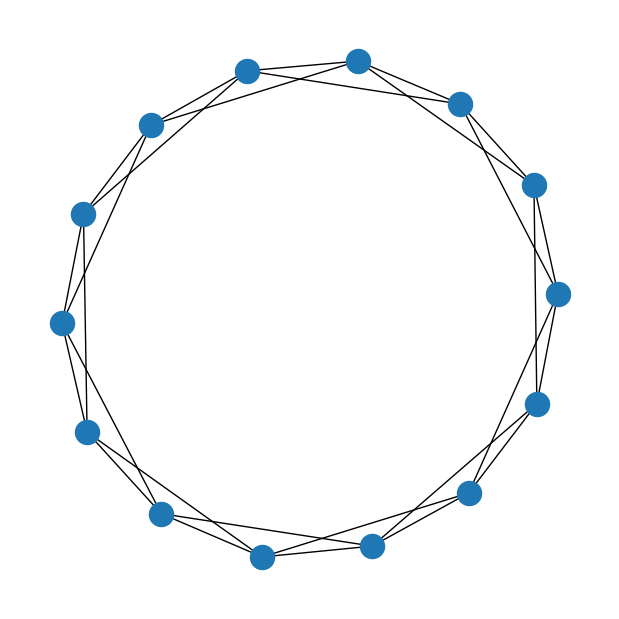

In [1]:
# Red de mundo pequeño de Watts-Strogatz

import networkx as nx
import matplotlib.pyplot as plt

n = 14 # numero de nodos
k = 4 # numero vecinos conectados con cada nodo

def initialize():
    global g
    g = nx.Graph()
    for i in range(n):
        for j in range(1, k // 2 + 1):
            g.add_edge(i, (i + j) % n)
            g.add_edge(i, (i - j) % n)
    g.pos = nx.spring_layout(g)

def observe():
    global g
    plt.figure(figsize=(6,6))
    nx.draw(g, pos = g.pos)

initialize()
observe()
plt.show()


In [2]:
print("Centralidad de grado:", nx.degree_centrality(g))
print("Centralidad de intermediación:", nx.betweenness_centrality(g))
print("Centralidad de cercanía:", nx.closeness_centrality(g))
print("Centralidad de vector propio:", nx.eigenvector_centrality(g))

Centralidad de grado: {0: 0.3076923076923077, 1: 0.3076923076923077, 13: 0.3076923076923077, 2: 0.3076923076923077, 12: 0.3076923076923077, 3: 0.3076923076923077, 4: 0.3076923076923077, 5: 0.3076923076923077, 6: 0.3076923076923077, 7: 0.3076923076923077, 8: 0.3076923076923077, 9: 0.3076923076923077, 10: 0.3076923076923077, 11: 0.3076923076923077}
Centralidad de intermediación: {0: 0.09615384615384615, 1: 0.09615384615384615, 13: 0.09615384615384615, 2: 0.09615384615384615, 12: 0.09615384615384615, 3: 0.09615384615384615, 4: 0.09615384615384615, 5: 0.09615384615384615, 6: 0.09615384615384615, 7: 0.09615384615384615, 8: 0.09615384615384615, 9: 0.09615384615384615, 10: 0.09615384615384615, 11: 0.09615384615384615}
Centralidad de cercanía: {0: 0.4642857142857143, 1: 0.4642857142857143, 13: 0.4642857142857143, 2: 0.4642857142857143, 12: 0.4642857142857143, 3: 0.4642857142857143, 4: 0.4642857142857143, 5: 0.4642857142857143, 6: 0.4642857142857143, 7: 0.4642857142857143, 8: 0.4642857142857143

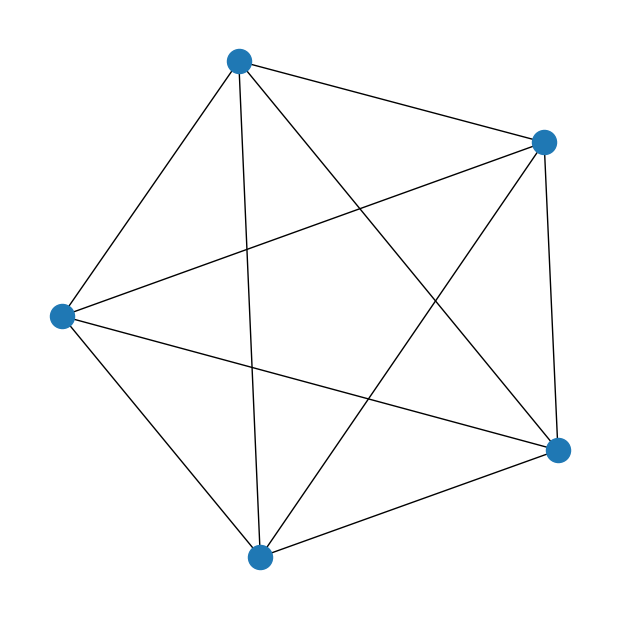

In [3]:
# Red de Barabasi-Albert

import networkx as nx
import matplotlib.pyplot as plt

m0 = 5 # numero de nodos en condiciones iniciales
m = 4 # numero de aristas por nuevo nodo

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)

def observe():
    global g
    plt.figure(figsize=(6,6))
    nx.draw(g, pos=g.pos)

initialize()
observe()
plt.show()


In [4]:
print("Centralidad de grado:", nx.degree_centrality(g))
print("Centralidad de intermediación:", nx.betweenness_centrality(g))
print("Centralidad de cercanía:", nx.closeness_centrality(g))
print("Centralidad de vector propio:", nx.eigenvector_centrality(g))

Centralidad de grado: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
Centralidad de intermediación: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}
Centralidad de cercanía: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
Centralidad de vector propio: {0: 0.447213595499958, 1: 0.447213595499958, 2: 0.447213595499958, 3: 0.447213595499958, 4: 0.447213595499958}


---

`Ejercicio 18 para casa`

>*Visualizar la estructura de la comunidad en el gráfico de Karate Club utilizando los ID de la comunidad como los colores de los nodos.*

---

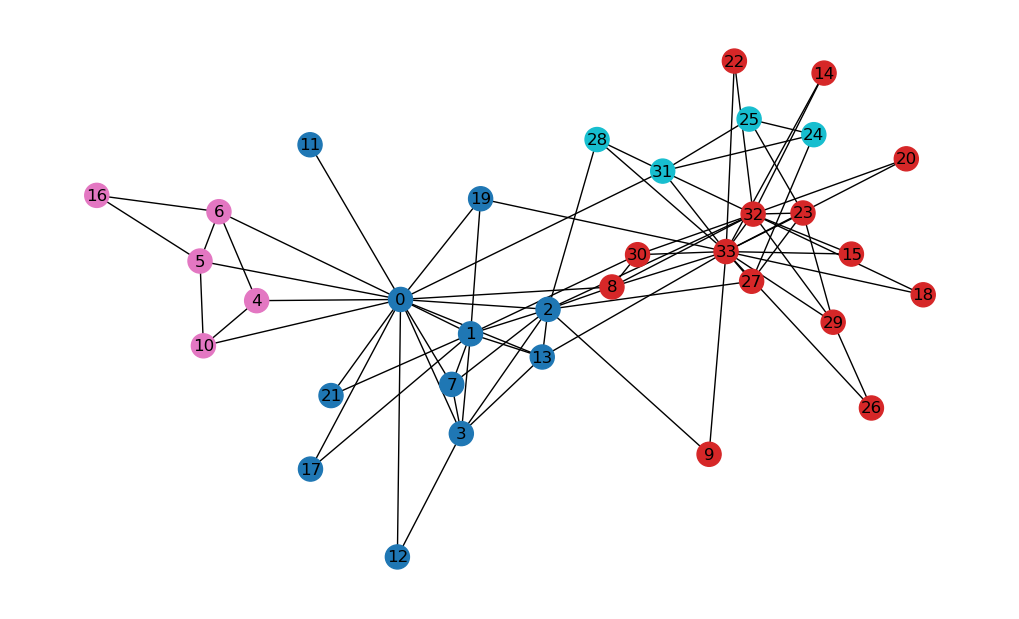

In [5]:
import networkx as nx
import community as comm
g = nx.karate_club_graph()
bp = comm.best_partition(g)

node_colors = [bp[node] for node in g.nodes()]

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color=node_colors, cmap=plt.cm.tab10, with_labels=True)
plt.show()

---

`Ejercicio 19 para casa`

>*Buscar otros algoritmos de detección de la comunidad (por ejemplo, el método Girvan-Newman, el método de percolación de k-clique, el método de camino aleatoria, etc.). Elije uno de ellos y, si el software está disponible, pruébalo en el grafo del Karate Club y observa cómo el resultado difiere del método Louvain.*

---

Text(0.5, 1.0, 'Método Girvan-Newman')

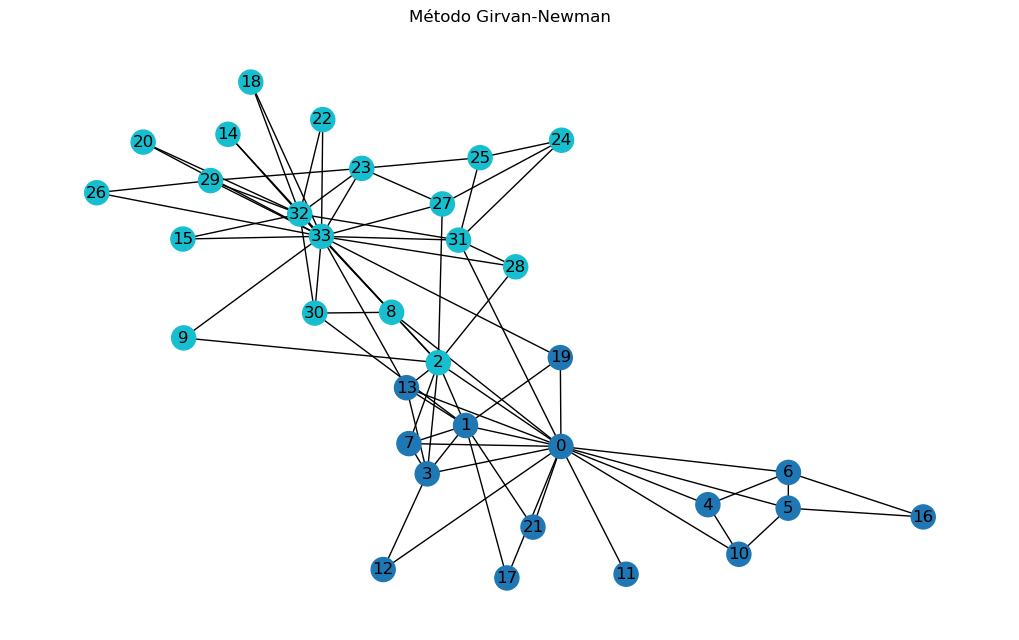

In [6]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt

g = nx.karate_club_graph()

comp = girvan_newman(g)

# Diccionario con colores
node_colors_gn = [0] * len(g.nodes())
for i, communities in enumerate(tuple(sorted(c) for c in next(comp))):
    for node in communities:
        node_colors_gn[node] = i

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color=node_colors_gn, cmap=plt.cm.tab10, with_labels=True)
plt.title("Método Girvan-Newman")

/var/folders/p9/nnj0ywtx27b7m3kq95j5n8mm0000gn/T/ipykernel_24971/1813172227.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(colors) + 2)


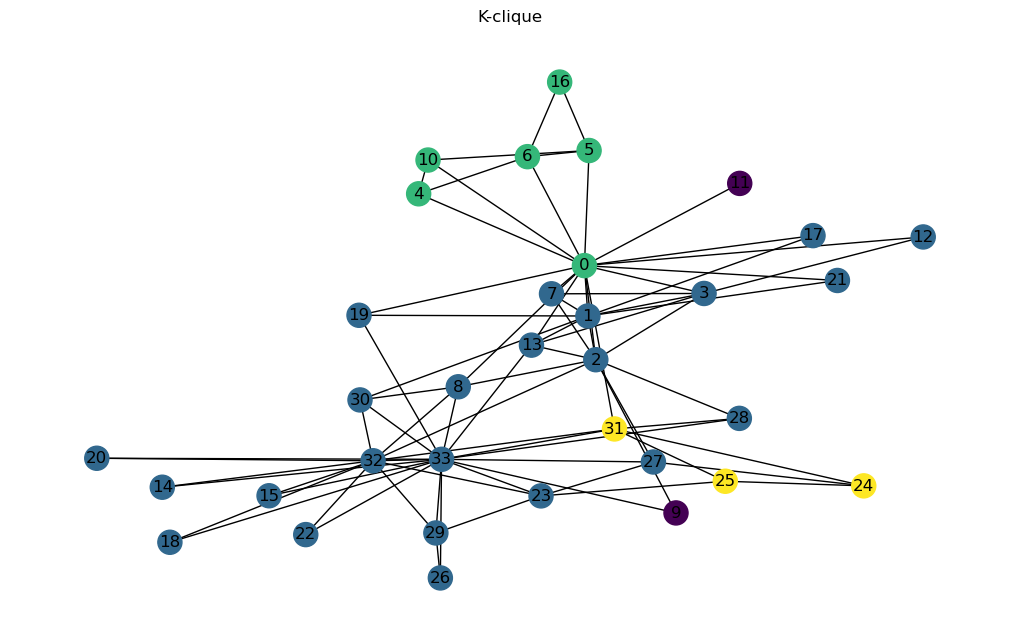

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities

g = nx.karate_club_graph()

k = 3
communities = list(k_clique_communities(g, k))

# Diccionario de colores
node_colors_K = {}
for i, community in enumerate(communities):
    for node in community:
        node_colors_K[node] = i

plt.figure(figsize=(10, 6))
colors = [node_colors_K[node] if node in node_colors_K else -1 for node in g.nodes()]
cmap = plt.cm.get_cmap('viridis', max(colors) + 2)
nx.draw(g, node_color=colors, with_labels=True, cmap=cmap)
plt.title("K-clique")
plt.show()


Se puede comprobar observando los gráficos que según el metodo empleado se realizan diferentes divisiones.